In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install wfdb
!pip install mne


     |████████████████████████████████| 102kB 4.3MB/s 
     |████████████████████████████████| 163kB 16.7MB/s 
  Created wheel for wfdb: filename=wfdb-2.2.1-cp36-none-any.whl size=100368 sha256=2f36d8db094c6deda02fbc969e76bae058009a32eb31059a0c2421b8feb0c284
  Stored in directory: /root/.cache/pip/wheels/bb/a9/00/0078d26b0c15b31be0001af8eb659496709c361c69641303f1
Successfully built wfdb
     |████████████████████████████████| 6.4MB 4.1MB/s 


In [3]:

!pip install git+https://github.com/forrestbao/pyeeg.git
!pip install git+https://github.com/talhaanwarch/entropy.git


  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-vfrmngu2
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-vfrmngu2
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28121 sha256=aa4f79c9bdc60341978dd20a043aaff95b93cedec28c62ad5c469fd09a4e98fd
  Stored in directory: /tmp/pip-ephem-wheel-cache-nxtfohfw/wheels/2d/3f/ad/106d4fc80b61d1ea1fc18e76e7439fd98aa043d83d58eae741
Successfully built pyeeg
  Cloning https://github.com/talhaanwarch/entropy.git to /tmp/pip-req-build-8uydo598
  Running command git clone -q https://github.com/talhaanwarch/entropy.git /tmp/pip-req-build-8uydo598
  Created wheel for entropy: filename=entropy-0.1.1-cp36-none-any.whl size=15447 sha256=f59565ee5900311f2de148ee0af682f0e3d06632d522014b8115c56dea32db91
  Stored in directory: /tmp/pip-ephem-wheel-cache-ihulz5tj/wheels/79/43/63/3fa9c8c5f03fe3a78d71c1aeedca9577f2f32fb2156ff9ecf8
Successfully built entropy


In [4]:
cd /content/drive/My Drive/dataset/schizophrenia16

/content/drive/My Drive/dataset/schizophrenia16


In [0]:
import numpy as np
from glob import glob

In [0]:
import pickle
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import signal


# Read Data

In [8]:
import numpy as np
x=np.array([1,2,3,4,5,6,7,8,9,10])
#first 5 represent one columns, next 5 represent next column
y=x.reshape(-1,5)
print(x)
print(y)
#http://brain.bio.msu.ru/eeg_schizophrenia.htm

[ 1  2  3  4  5  6  7  8  9 10]
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]


In [0]:
HC_path=glob('norm/*.eea')
SZ_path=glob('sch/*.eea')

In [0]:
from scipy import signal
nyq = 0.5 * 128
l=0.2
low = l / nyq
high = 45 / nyq
b, a = signal.butter(4, [low,high], 'band')
#pca=PCA(6)

In [0]:
HC=[]#trialxsample x channels
for i in HC_path:
    data=np.loadtxt(i)
    data=data.reshape(-1,7680) #datapoints x columns
    # Tranpose is taken becz data should be columns into sample points
    data=signal.filtfilt(b, a, data) 
    data=data.reshape(data.shape[0],-1,512).T
    data=np.swapaxes(data,0,1)
    HC.append(data)
# (122880,)
# (16, 7680)
# (16, 7680)
# (512, 15, 16)
# (15, 512, 16)

In [0]:
SZ=[]
for i in SZ_path:
    data=np.loadtxt(i)
    data=data.reshape(-1,7680) #datapoints x columns
    # Tranpose is taken becz data should be columns into sample points
    data=signal.filtfilt(b, a, data) 
    data=data.reshape(data.shape[0],-1,512).T
    data=np.swapaxes(data,0,1)
    SZ.append(data)

In [13]:
data.shape

(15, 512, 16)

In [14]:
HC[0].shape,SZ[0].shape

((15, 512, 16), (15, 512, 16))

# Feature Calculation

In [0]:
from scipy import stats
import pyeeg
from entropy import *
def mean(data):
    return np.mean(data,axis=0)
    
def std(data):
    return np.std(data,axis=0)

def ptp(data):
    return np.ptp(data,axis=0)

def var(data):
        return np.var(data,axis=0)

def minim(data):
      return np.min(data,axis=0)


def maxim(data):
      return np.max(data,axis=0)


def mean_square(data):
      return np.mean(data**2,axis=0)

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)


def skewness(data):
    return stats.skew(data,axis=0)

def kurtosis(data):
    return stats.kurtosis(data,axis=0)

def zero_crossing(data):
    return np.argmax(np.diff(np.sign(data),axis=0),axis=0)

def app_epy(data):
    result=[]
    for i in data.T:
        result.append(app_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)

def perm_epy(data):
    result=[]
    for i in data.T:
        result.append(perm_entropy(i, order=3, normalize=True))
    return np.array(result)

def svd_epy(data):
    result=[]
    for i in data.T:
        result.append(svd_entropy(i, order=3, delay=1, normalize=True))
    return np.array(result)

def spectral_epy(data):
    result=[]
    for i in data.T:
        result.append(spectral_entropy(i, 100, method='welch', normalize=True))
    return np.array(result)

def sample_epy(data):
    result=[]
    for i in data.T:
        result.append(sample_entropy(i, order=2, metric='chebyshev'))
    return np.array(result)


def katz(data):
    result=[]
    for i in data.T:
        result.append(katz_fd(i))
    return np.array(result)

def higuchi(data):
    result=[]
    for i in data.T:
        result.append(higuchi_fd(i))
    return np.array(result)


def petrosian(data):
    result=[]
    for i in data.T:
        result.append(petrosian_fd(i))
    return np.array(result)

def autogressiveModelParameters(data):
    feature = []
    for i in data.T:
        coeff, sig = alg.AR_est_YW(i, order=5)
        feature.append(np.mean(coeff))
    return np.array(feature)

def teager(x):
    for i in range(len(x)-1):
        return x[i]**2 - (x[i-1]*x[i+1])


        
def hjorth_mobility(data):
    return np.divide(np.std(np.diff(data,axis=0),axis=0),np.std(data,axis=0))

def hjorth_complexity(data):
    return np.divide(hjorth_mobility(np.diff(data,axis=0)),  hjorth_mobility(data))      




def concatenate_features(data):
    return np.concatenate((mean(data),std(data),ptp(data),var(data),minim(data),maxim(data),
                          mean_square(data),rms(data),abs_diffs_signal(data),
                          skewness(data),kurtosis(data),zero_crossing(data),
                          app_epy(data),perm_epy(data),svd_epy(data),spectral_epy(data),sample_epy(data),
                          katz(data),higuchi(data),petrosian(data),
                          hjorth_mobility(data),hjorth_complexity(data)),axis=0)

In [0]:
features1=[]
for f in HC:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features1.append(np.mean(np.array(feature),axis=0))
    

In [0]:

features2=[]
for f in SZ:
    feature=[]
    for i in f:
        feature.append(concatenate_features(i))
    features2.append(np.mean(np.array(feature),axis=0))

In [0]:
x1=np.array(features1)        
x2=np.array(features2)      

X=np.concatenate((x1,x2),axis=0)
y=np.concatenate(((np.zeros(x1.shape[0])),(np.ones(x2.shape[0]))))


In [112]:
X.shape,y.shape

((84, 352), (84,))

# Classification

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42,stratify=y)

In [0]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [115]:
clf=SVC()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.50      0.60        12
         1.0       0.67      0.86      0.75        14

    accuracy                           0.69        26
   macro avg       0.71      0.68      0.68        26
weighted avg       0.71      0.69      0.68        26

accuracy is  0.6923076923076923


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [117]:
scalar = StandardScaler()
pipeline = Pipeline([('transformer', scalar), ('estimator', clf)])

scores = cross_val_score(pipeline, X, y, cv =5)
print('average accuracy : ',np.array(scores).mean(),np.std(np.array(scores)))


average accuracy :  0.6558823529411765 0.10506218293818675


In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clf = SVC(kernel="rbf")
Cs = [ 1,2,3,5,7,10,15,30,50,70,100]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7044117647058823


{'classifier__C': 2, 'classifier__gamma': 0.01}

In [0]:
ch=16

#Feature Selection

In [0]:
X=np.concatenate((x1,x2),axis=0)
y=np.concatenate(((np.zeros(x1.shape[0])),(np.ones(x2.shape[0]))))

In [0]:
feature_list=['mean','std','ptp','var','minim','maxim','mean_square','rms','abs_diffs_signal','skewness','kurtosis','zero_crossing',
'app_epy','perm_epy','svd_epy','spectral_epy','sample_epy','katz','higuchi','petrosian','hjorth_mobility','hjorth_complexity']

In [0]:

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="rbf"),
    DecisionTreeClassifier(),
    LogisticRegression()]

In [0]:
X_all=X.copy()
y_all=y.copy()
clf_feature_selected=[]
for clf in classifiers:
    feature_selected=[]
    for i in range(100):
        randomize = np.arange(len(X_all))
        np.random.shuffle(randomize)
        X_all = X_all[randomize]
        y_all = y_all[randomize]
        for i,j in zip(range(0,X_all.shape[1],ch),feature_list):
            X_new=X_all[:,i:i+ch]
            y_new=y_all.copy()
            X_train, X_test, y_train, y_test = train_test_split(X_new, y_all,test_size=0.2, random_state=42,stratify=y_all)
            sc=StandardScaler()
            X_train=sc.fit_transform(X_train)
            X_test=sc.transform(X_test)

            clf.fit(X_train,y_train)
            y_pred = clf.predict(X_test)  
            acc=metrics.accuracy_score(y_test, y_pred)
      #print("Accuracy of ",j,metrics.accuracy_score(y_test, y_pred))
            if acc>0.8:
                feature_selected.append(j)
    clf_feature_selected.append(feature_selected)        
 # print('-------------------------------------------------------------------')

In [157]:

clf_list=['KNN','SVM','DT','LR']
from collections import Counter
clf_count=[]
for i,j in zip(range(4),clf_list):
    feature_selected=clf_feature_selected[i]
    count= {x:feature_selected.count(x) for x in feature_selected}
    c = Counter(count)
    #print(c.most_common())
    #clf_count.append(c.most_common(10))
    print('==================================================================================================')
    print(j,c.most_common(10))

KNN [('minim', 8), ('spectral_epy', 7), ('abs_diffs_signal', 7), ('app_epy', 6), ('std', 5), ('rms', 5), ('petrosian', 5), ('hjorth_complexity', 5), ('var', 4), ('mean_square', 4)]
SVM [('hjorth_complexity', 15), ('svd_epy', 10), ('spectral_epy', 10), ('hjorth_mobility', 10), ('petrosian', 10), ('perm_epy', 9), ('higuchi', 8), ('kurtosis', 6), ('abs_diffs_signal', 6), ('app_epy', 5)]
DT [('hjorth_complexity', 16), ('spectral_epy', 7), ('katz', 6), ('var', 6), ('rms', 6), ('sample_epy', 5), ('std', 4), ('abs_diffs_signal', 4), ('minim', 3), ('mean_square', 3)]
LR [('hjorth_complexity', 29), ('perm_epy', 21), ('petrosian', 21), ('spectral_epy', 19), ('abs_diffs_signal', 17), ('app_epy', 10), ('sample_epy', 9), ('std', 8), ('rms', 8), ('hjorth_mobility', 8)]


In [0]:

from collections import Counter
clf_feature=[]
for i in range(4):
    feature_selected=clf_feature_selected[i]
    count= {x:feature_selected.count(x) for x in feature_selected}
    c = Counter(count)
   # c={k: v / total for total in (sum(c.values(), 0.0),) for k, v in c.items()}

    for k,v in c.items():
        if v>3:
            clf_feature.append(k)

In [159]:

count= {x:clf_feature.count(x) for x in clf_feature}
c = Counter(count)
print(c.most_common())
good_feature=[]
for i in range(len(c.keys())):
      good_feature.append(c.most_common()[i][0])
print('===============================================================================================================')
print(good_feature)

[('std', 4), ('rms', 4), ('hjorth_complexity', 4), ('spectral_epy', 4), ('abs_diffs_signal', 4), ('app_epy', 3), ('petrosian', 3), ('var', 3), ('maxim', 3), ('sample_epy', 3), ('katz', 3), ('minim', 2), ('mean_square', 2), ('higuchi', 2), ('svd_epy', 2), ('hjorth_mobility', 2), ('perm_epy', 2), ('ptp', 2), ('kurtosis', 1), ('skewness', 1)]
['std', 'rms', 'hjorth_complexity', 'spectral_epy', 'abs_diffs_signal', 'app_epy', 'petrosian', 'var', 'maxim', 'sample_epy', 'katz', 'minim', 'mean_square', 'higuchi', 'svd_epy', 'hjorth_mobility', 'perm_epy', 'ptp', 'kurtosis', 'skewness']


In [160]:

X_good=[]
for key,val in zip(feature_list,range(0,X.shape[1],16)):
    for fe in good_feature:
        if key==fe:     
            print('key',key,'value',val,":",val+16) 
            X_good.append(X[:,val:val+16])

key std value 16 : 32
key ptp value 32 : 48
key var value 48 : 64
key minim value 64 : 80
key maxim value 80 : 96
key mean_square value 96 : 112
key rms value 112 : 128
key abs_diffs_signal value 128 : 144
key skewness value 144 : 160
key kurtosis value 160 : 176
key app_epy value 192 : 208
key perm_epy value 208 : 224
key svd_epy value 224 : 240
key spectral_epy value 240 : 256
key sample_epy value 256 : 272
key katz value 272 : 288
key higuchi value 288 : 304
key petrosian value 304 : 320
key hjorth_mobility value 320 : 336
key hjorth_complexity value 336 : 352


In [0]:

X=np.concatenate((X_good),axis=1)


# Tuning

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clf = SVC(kernel="rbf")
Cs = [ 1,2,3,5,7,10,15,30,50,70,100]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7735294117647058


{'classifier__C': 15, 'classifier__gamma': 0.001}

### NuSVM

In [163]:
from sklearn.svm import SVC, LinearSVC, NuSVC

clf = NuSVC(kernel="rbf")
nu = [0.1,0.3,0.5,0.7]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__nu=nu,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7735294117647059


{'classifier__gamma': 0.001, 'classifier__nu': 0.3}

### LR

In [164]:
clf = LogisticRegression()
C = [ 1,2,3,5,7,10,15,30,50,70,100]
penalty=["l1","l2"]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__C=C,classifier__penalty=penalty),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7257352941176471


{'classifier__C': 50, 'classifier__penalty': 'l2'}

### KNN

In [165]:

clf = KNeighborsClassifier()

n_neighbors  = [ 3,4,5,6,7,8,9,11,13]
weights  = ['uniform','distance']
metric=['minkowski','manhattan','euclidean']
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__n_neighbors=n_neighbors,classifier__weights=weights,classifier__metric=metric),cv=5,n_jobs=-1,iid=False) 
results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7264705882352942


{'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 4,
 'classifier__weights': 'distance'}

# Cross Validation

In [0]:
classifiers = [
    KNeighborsClassifier(n_neighbors=4,weights='distance',metric='minkowski'),
    SVC(kernel="rbf",C=15,gamma=0.001),
    NuSVC(nu=0.3,gamma=0.001),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(C=50,penalty='l2')]

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('transformer', sc),('estimator', clf)])


In [169]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy=[]
accuracy_std=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy.append(np.array(scores).mean())
    accuracy_std.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 72.6471%
SVC
****Results****
Accuracy: 77.3529%
NuSVC
****Results****
Accuracy: 77.3529%
DecisionTreeClassifier
****Results****
Accuracy: 75.2206%
RandomForestClassifier
****Results****
Accuracy: 77.5000%
AdaBoostClassifier
****Results****
Accuracy: 63.0882%
GradientBoostingClassifier
****Results****
Accuracy: 70.3676%
GaussianNB
****Results****
Accuracy: 64.2647%
LinearDiscriminantAnalysis
****Results****
Accuracy: 65.6618%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 46.3235%
LogisticRegression
****Results****
Accuracy: 72.5735%


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/d

Text(0.5, 1.0, 'Classifiers')

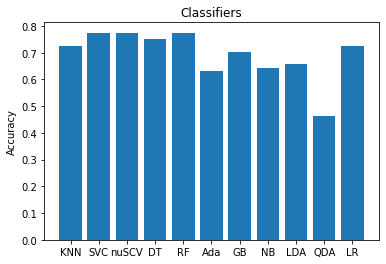

In [170]:
import matplotlib.pyplot as plt
classifier=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR']
y_pos = np.arange(len(classifier))
plt.bar(y_pos,np.array(accuracy))
plt.xticks(y_pos, classifier)
plt.ylabel('Accuracy')
plt.title('Classifiers')

# Principle Component Analysis

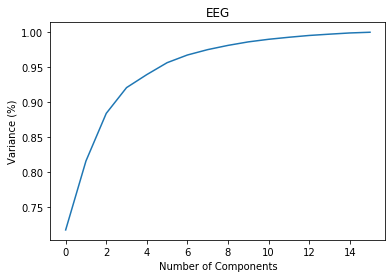

In [171]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('EEG')
plt.show()

In [0]:
clf = SVC(kernel='rbf')
pca = PCA(n_components=10)

#pipeline = Pipeline([('selector',pca), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',pca), ('estimator', clf)])


In [173]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_pca=[]
std_pca=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_pca.append(np.array(scores).mean())
    std_pca.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 69.1912%
SVC
****Results****
Accuracy: 65.3676%
NuSVC
****Results****
Accuracy: 71.4706%
DecisionTreeClassifier
****Results****
Accuracy: 52.5735%
RandomForestClassifier
****Results****
Accuracy: 60.6618%
AdaBoostClassifier
****Results****
Accuracy: 66.7647%
GradientBoostingClassifier
****Results****
Accuracy: 65.6618%
GaussianNB
****Results****
Accuracy: 73.8971%
LinearDiscriminantAnalysis
****Results****
Accuracy: 63.2353%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 66.7647%
LogisticRegression
****Results****
Accuracy: 65.5147%


In [174]:
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel="rbf")
n_components = [5,10,15,20]
Cs = [0.001,0.1, 1,2,3,5,7,10,15,30]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scalar',sc),('selector', pca), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(selector__n_components=n_components,
                              classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7492647058823529


{'classifier__C': 30, 'classifier__gamma': 0.001, 'selector__n_components': 20}

In [175]:
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
n_components = [5,10,15,20]
n_neighbors  = [ 3,4,5,6,7,8,9]
weights  = ['uniform','distance']
metric=['minkowski','manhattan','euclidean']
pipe = Pipeline(steps=[('scalar',sc),('selector', pca), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(selector__n_components=n_components,
                              classifier__n_neighbors=n_neighbors,classifier__weights=weights,classifier__metric=metric),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7272058823529413


{'classifier__metric': 'manhattan',
 'classifier__n_neighbors': 3,
 'classifier__weights': 'uniform',
 'selector__n_components': 10}

# RFE

In [0]:
from sklearn.feature_selection import RFE

In [0]:

clf = SVC(kernel='rbf')
rfe=RFE(SVC(kernel='linear'),n_features_to_select=5,step=1,verbose=0)   

#pipeline = Pipeline([('selector',rfe), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',rfe), ('estimator', clf)])


In [178]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_rfe=[]
std_rfe=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_rfe.append(np.array(scores).mean())
    std_rfe.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 69.0441%
SVC
****Results****
Accuracy: 66.9118%
NuSVC
****Results****
Accuracy: 70.3676%
DecisionTreeClassifier
****Results****
Accuracy: 65.8088%
RandomForestClassifier
****Results****
Accuracy: 67.9412%
AdaBoostClassifier
****Results****
Accuracy: 68.8971%
GradientBoostingClassifier
****Results****
Accuracy: 64.3382%
GaussianNB
****Results****
Accuracy: 63.0147%
LinearDiscriminantAnalysis
****Results****
Accuracy: 71.4706%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 72.6471%
LogisticRegression
****Results****
Accuracy: 72.7941%


# SKbest

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [0]:

clf = SVC(kernel='rbf')
skbest=SelectKBest(f_classif, k=10)
#pipeline = Pipeline([('selector',skbest), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',rfe), ('estimator', clf)])


In [181]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_kbest=[]
std_kbest=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_kbest.append(np.array(scores).mean())
    std_kbest.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 69.0441%
SVC
****Results****
Accuracy: 66.9118%
NuSVC
****Results****
Accuracy: 70.3676%
DecisionTreeClassifier
****Results****
Accuracy: 63.3088%
RandomForestClassifier
****Results****
Accuracy: 62.0588%
AdaBoostClassifier
****Results****
Accuracy: 68.8971%
GradientBoostingClassifier
****Results****
Accuracy: 64.3382%
GaussianNB
****Results****
Accuracy: 63.0147%
LinearDiscriminantAnalysis
****Results****
Accuracy: 71.4706%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 72.6471%
LogisticRegression
****Results****
Accuracy: 72.7941%


# VarianceThreshold

In [0]:
from sklearn.feature_selection import VarianceThreshold
clf = SVC(kernel='rbf')
selector = VarianceThreshold(0.05)
#pipeline = Pipeline([('selector',algo), ('estimator', clf)])
pipeline = Pipeline([('transformer', sc),('selector',selector), ('estimator', clf)])


In [183]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_var=[]
std_var=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_var.append(np.array(scores).mean())
    std_var.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 72.6471%
SVC
****Results****
Accuracy: 77.3529%
NuSVC
****Results****
Accuracy: 77.3529%
DecisionTreeClassifier
****Results****
Accuracy: 75.0735%
RandomForestClassifier
****Results****
Accuracy: 65.6618%
AdaBoostClassifier
****Results****
Accuracy: 63.0882%
GradientBoostingClassifier
****Results****
Accuracy: 70.2941%
GaussianNB
****Results****
Accuracy: 64.2647%
LinearDiscriminantAnalysis
****Results****
Accuracy: 65.6618%
QuadraticDiscriminantAnalysis
****Results****


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/d

Accuracy: 46.3235%
LogisticRegression
****Results****
Accuracy: 72.5735%


# Result

In [184]:
len(accuracy),len(accuracy_pca),len(accuracy_rfe),len(accuracy_kbest),len(accuracy_var)

(11, 11, 11, 11, 11)

In [0]:
result=pd.DataFrame([accuracy,accuracy_pca,accuracy_rfe,accuracy_kbest,accuracy_var],
                    index=['Accuracy','PCA',"RFE",'kbest','VAR'],
                    columns=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR'])

In [0]:
result=result.T

In [187]:

def _color_red_or_green(val):
    color = 'red' if val < 0.7 else 'green'
    return 'color: %s' % color
result.style.applymap(_color_red_or_green)

,Accuracy,PCA,RFE,kbest,VAR
KNN,0.726471,0.691912,0.690441,0.690441,0.726471
SVC,0.773529,0.653676,0.669118,0.669118,0.773529
nuSCV,0.773529,0.714706,0.703676,0.703676,0.773529
DT,0.752206,0.525735,0.658088,0.633088,0.750735
RF,0.775,0.606618,0.679412,0.620588,0.656618
Ada,0.630882,0.667647,0.688971,0.688971,0.630882
GB,0.703676,0.656618,0.643382,0.643382,0.702941
NB,0.642647,0.738971,0.630147,0.630147,0.642647
LDA,0.656618,0.632353,0.714706,0.714706,0.656618
QDA,0.463235,0.667647,0.726471,0.726471,0.463235
